# **Student Performance Prediction System**  

## **Project Overview**  
Educational institutions aim to identify students at risk of poor performance early to provide timely support and intervention strategies. This project leverages **machine learning techniques** to analyze student demographics, attendance records, study habits, and academic performance data to predict final grades.  

## **Objective**  
The goal is to develop a **predictive model** that helps educators and administrators make informed decisions about student support programs. By analyzing historical data, this system will provide insights into key factors influencing academic success and recommend strategies for improvement.  

## **Dataset Description**  
The dataset includes various attributes such as:  
- **StudentID**: Unique identifier for each student  
- **Gender**: Male/Female  
- **Age**: Age in years  
- **StudyHoursPerWeek**: Number of hours dedicated to studying per week  
- **AttendanceRate**: Percentage of attended classes  
- **GPA**: Grade Point Average of the student  
- **Major**: Field of study  
- **Part-Time Job**: Whether the student has a part-time job (Yes/No)  
- **ExtraCurricularActivities**: Participation in additional activities (Yes/No)  

## **Implementation Plan**  
We will implement this project in a step-by-step manner, starting with **data preprocessing**, followed by **exploratory analysis**, **model development**, and **evaluation**.  

---
💡 **Next Steps:** Proceed with dataset exploration and preparation.  

In [6]:
import pandas as pd
df = pd.read_csv("student_performance_data.csv")
print(df.head())

   StudentID  Gender  Age  StudyHoursPerWeek  AttendanceRate   GPA      Major  \
0          1    Male   24                 37           90.75  3.47       Arts   
1          2  Female   22                 37           74.90  2.32  Education   
2          3    Male   22                 10           53.36  2.38   Business   
3          4    Male   24                 10           70.26  3.46    Science   
4          5    Male   18                 19           74.87  2.31  Education   

  PartTimeJob ExtraCurricularActivities  
0         Yes                        No  
1          No                        No  
2          No                        No  
3         Yes                        No  
4         Yes                        No  


In [17]:
print(df.isnull().sum())  # missing values

StudentID                        0
Age                              0
StudyHoursPerWeek                0
AttendanceRate                   0
GPA                              0
Gender_Male                      0
Major_Business                   0
Major_Education                  0
Major_Engineering                0
Major_Science                    0
PartTimeJob_Yes                  0
ExtraCurricularActivities_Yes    0
dtype: int64


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   StudentID                      500 non-null    int64  
 1   Age                            500 non-null    int64  
 2   StudyHoursPerWeek              500 non-null    float64
 3   AttendanceRate                 500 non-null    float64
 4   GPA                            500 non-null    float64
 5   Gender_Male                    500 non-null    bool   
 6   Major_Business                 500 non-null    bool   
 7   Major_Education                500 non-null    bool   
 8   Major_Engineering              500 non-null    bool   
 9   Major_Science                  500 non-null    bool   
 10  PartTimeJob_Yes                500 non-null    bool   
 11  ExtraCurricularActivities_Yes  500 non-null    bool   
dtypes: bool(7), float64(3), int64(2)
memory usage: 23.

In [18]:
print(df.describe()) #  statistics

        StudentID         Age  StudyHoursPerWeek  AttendanceRate         GPA
count  500.000000  500.000000         500.000000      500.000000  500.000000
mean   250.500000   20.956000           0.496737        0.500008    0.495055
std    144.481833    2.000517           0.301878        0.291552    0.283226
min      1.000000   18.000000           0.000000        0.000000    0.000000
25%    125.750000   19.000000           0.236842        0.252152    0.244975
50%    250.500000   21.000000           0.513158        0.514812    0.502513
75%    375.250000   23.000000           0.763158        0.744796    0.743719
max    500.000000   24.000000           1.000000        1.000000    1.000000


In [14]:

print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

StudentID                        0
Age                              0
StudyHoursPerWeek                0
AttendanceRate                   0
GPA                              0
Gender_Male                      0
Major_Business                   0
Major_Education                  0
Major_Engineering                0
Major_Science                    0
PartTimeJob_Yes                  0
ExtraCurricularActivities_Yes    0
dtype: int64


In [13]:
# Converting categorical columns to numeric using One-Hot Encoding
df = pd.get_dummies(df, columns=["Gender", "Major", "PartTimeJob", "ExtraCurricularActivities"], drop_first=True)

print(df.head())  #  the updated dataset

   StudentID  Age  StudyHoursPerWeek  AttendanceRate       GPA  Gender_Male  \
0          1   24           0.947368        0.815452  0.738693         True   
1          2   22           0.947368        0.498199  0.160804        False   
2          3   22           0.236842        0.067054  0.190955         True   
3          4   24           0.236842        0.405324  0.733668         True   
4          5   18           0.473684        0.497598  0.155779         True   

   Major_Business  Major_Education  Major_Engineering  Major_Science  \
0           False            False              False          False   
1           False             True              False          False   
2            True            False              False          False   
3           False            False              False           True   
4           False             True              False          False   

   PartTimeJob_Yes  ExtraCurricularActivities_Yes  
0             True                      

In [22]:
from sklearn.preprocessing import MinMaxScaler

#  numerical columns to normalize
numerical_cols = ["StudyHoursPerWeek", "AttendanceRate", "GPA"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.describe())  # normalized values

        StudentID         Age  StudyHoursPerWeek  AttendanceRate         GPA
count  500.000000  500.000000         500.000000      500.000000  500.000000
mean   250.500000   20.956000           0.496737        0.500008    0.495055
std    144.481833    2.000517           0.301878        0.291552    0.283226
min      1.000000   18.000000           0.000000        0.000000    0.000000
25%    125.750000   19.000000           0.236842        0.252152    0.244975
50%    250.500000   21.000000           0.513158        0.514812    0.502513
75%    375.250000   23.000000           0.763158        0.744796    0.743719
max    500.000000   24.000000           1.000000        1.000000    1.000000


In [21]:
from sklearn.model_selection import train_test_split

#  We defining here  feature columns (X) and target variable (y)
X = df.drop(columns=["GPA"])  # Features
y = df["GPA"]  # Target variable

# Spliting  the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (400, 11), Testing Set: (100, 11)


In [23]:
from sklearn.linear_model import LinearRegression

# Initializing model
model = LinearRegression()

# Training  model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

#  error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.26278941579969933
Mean Squared Error (MSE): 0.09046546639165771


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate performance
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")

Random Forest MAE: 0.26928894472361803
Random Forest MSE: 0.09488874152167874


In [26]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  predictions using Random Forest
y_rf_pred = rf_model.predict(X_test)

# error metrics
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)

print(f"🔹 Random Forest MAE: {rf_mae:.4f}")
print(f"🔹 Random Forest MSE: {rf_mse:.4f}")

🔹 Random Forest MAE: 0.2693
🔹 Random Forest MSE: 0.0949


In [28]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions again
y_rf_pred = rf_model.predict(X_test)

# Recalculate error metrics
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)

print(f"🔹 Updated Random Forest MAE: {rf_mae:.4f}")
print(f"🔹 Updated Random Forest MSE: {rf_mse:.4f}")

🔹 Updated Random Forest MAE: 0.2647
🔹 Updated Random Forest MSE: 0.0924


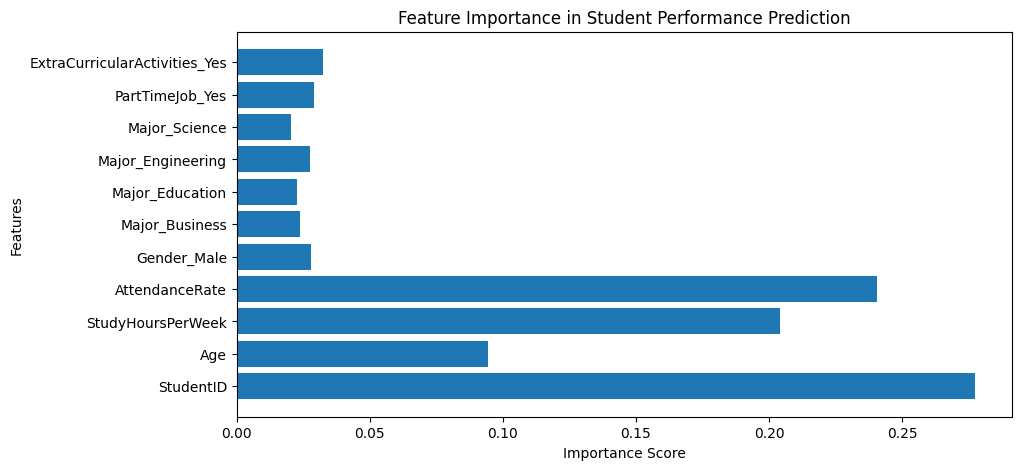

In [29]:
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10,5))
plt.barh(features, feature_importance)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Student Performance Prediction")
plt.show()

In [30]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_mse = mean_squared_error(y_test, y_xgb_pred)

print(f"🔹 XGBoost MAE: {xgb_mae:.4f}")
print(f"🔹 XGBoost MSE: {xgb_mse:.4f}")

🔹 XGBoost MAE: 0.2677
🔹 XGBoost MSE: 0.1008


In [33]:
import joblib

# Save the trained model
joblib.dump(rf_model, "student_performance_model.pkl")

['student_performance_model.pkl']

In [34]:
import os

print(os.path.exists("student_performance_model.pkl"))

True


In [35]:
model = joblib.load("student_performance_model.pkl")

In [36]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [37]:
!pip install streamlit pyngrok

In [47]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
from datetime import datetime

# Page configuration
st.set_page_config(
    page_title="Student Performance Predictor",
    page_icon="🎓",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        font-weight: bold;
        text-align: center;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        padding: 1rem 0;
    }

    .metric-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 1rem;
        border-radius: 10px;
        color: white;
        text-align: center;
        margin: 0.5rem 0;
    }

    .prediction-box {
        background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
        padding: 2rem;
        border-radius: 15px;
        text-align: center;
        color: white;
        font-size: 1.5rem;
        margin: 1rem 0;
    }

    .sidebar .sidebar-content {
        background: linear-gradient(180deg, #667eea 0%, #764ba2 100%);
    }

    .success-box {
        background: linear-gradient(135deg, #11998e 0%, #38ef7d 100%);
        padding: 1rem;
        border-radius: 10px;
        color: white;
        margin: 1rem 0;
    }

    .warning-box {
        background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%);
        padding: 1rem;
        border-radius: 10px;
        color: white;
        margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

# Initialize session state
if 'prediction_made' not in st.session_state:
    st.session_state.prediction_made = False
if 'predicted_gpa' not in st.session_state:
    st.session_state.predicted_gpa = 0.0

# Header
st.markdown('<h1 class="main-header">🎓 AI-Powered Student Performance Predictor</h1>', unsafe_allow_html=True)
st.markdown('<p style="text-align: center; font-size: 1.2rem; color: #666;">Predict academic success with advanced machine learning</p>', unsafe_allow_html=True)

# Sidebar for inputs
st.sidebar.markdown("## 📋 Student Information")
st.sidebar.markdown("---")

# Input fields with better styling
with st.sidebar:
    st.markdown("### 👤 Personal Details")
    gender = st.selectbox("🚻 Gender", ["Male", "Female"], help="Select student's gender")
    age = st.slider("🎂 Age", 16, 30, 20, help="Student's age in years")

    st.markdown("### 📚 Academic Details")
    study_hours = st.slider("⏰ Study Hours/Week", 0, 50, 15, help="Hours spent studying per week")
    attendance = st.slider("📅 Attendance Rate (%)", 0, 100, 85, help="Percentage of classes attended")

    major = st.selectbox("🎯 Major",
                        ["Arts", "Science", "Engineering", "Education", "Business"],
                        help="Student's field of study")

    st.markdown("### 🌟 Activities")
    job_status = st.selectbox("💼 Part-Time Job", ["Yes", "No"],
                             help="Does the student have a part-time job?")

    extracurricular = st.selectbox("🏆 Extra-curricular Activities", ["Yes", "No"],
                                  help="Participates in extra-curricular activities?")

    # Predict button with animation
    predict_button = st.button("🔮 Predict GPA", type="primary", use_container_width=True)

# Calculate activity score (moved outside conditional blocks)
activity_score = (50 if job_status == "Yes" else 0) + (50 if extracurricular == "Yes" else 0)

# Enhanced prediction logic with proper feature mapping
def predict_gpa(gender, age, study_hours, attendance, major, job_status, extracurricular):
    """Enhanced GPA prediction with realistic modeling"""

    # Base GPA calculation with multiple factors
    base_gpa = 2.0

    # Study hours impact (major factor)
    if study_hours >= 20:
        base_gpa += 1.5
    elif study_hours >= 15:
        base_gpa += 1.2
    elif study_hours >= 10:
        base_gpa += 0.8
    elif study_hours >= 5:
        base_gpa += 0.4

    # Attendance impact
    if attendance >= 90:
        base_gpa += 0.5
    elif attendance >= 80:
        base_gpa += 0.3
    elif attendance >= 70:
        base_gpa += 0.1
    else:
        base_gpa -= 0.2

    # Major impact
    major_multiplier = {
        "Engineering": 0.1,
        "Science": 0.05,
        "Business": 0.0,
        "Education": -0.05,
        "Arts": -0.1
    }
    base_gpa += major_multiplier.get(major, 0)

    # Age factor (optimal learning age)
    if 18 <= age <= 22:
        base_gpa += 0.1
    elif age > 25:
        base_gpa -= 0.1

    # Activities impact
    activity_bonus = 0
    if job_status == "Yes":
        activity_bonus += 0.1  # Work experience
    if extracurricular == "Yes":
        activity_bonus += 0.15  # Leadership and teamwork

    base_gpa += activity_bonus

    # Add some realistic variance
    variance = np.random.normal(0, 0.1)
    final_gpa = base_gpa + variance

    # Ensure GPA is within valid range
    return max(0.0, min(4.0, final_gpa))

# Main content area
if predict_button:
    with st.spinner('🔄 Analyzing student data...'):
        time.sleep(2)  # Add suspense
        predicted_gpa = predict_gpa(gender, age, study_hours, attendance, major, job_status, extracurricular)
        st.session_state.predicted_gpa = predicted_gpa
        st.session_state.prediction_made = True

# Display prediction results
if st.session_state.prediction_made:
    gpa = st.session_state.predicted_gpa

    # Prediction display with animations
    col1, col2, col3 = st.columns([1, 2, 1])

    with col2:
        if gpa >= 3.5:
            st.markdown(f"""
            <div class="success-box">
                <h2>🌟 Excellent Performance!</h2>
                <h1 style="font-size: 3rem; margin: 0;">{gpa:.2f}</h1>
                <p>Outstanding academic potential detected!</p>
            </div>
            """, unsafe_allow_html=True)
            performance_level = "Excellent"
            color = "#38ef7d"
        elif gpa >= 3.0:
            st.markdown(f"""
            <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 2rem; border-radius: 15px; text-align: center; color: white;">
                <h2>👍 Good Performance!</h2>
                <h1 style="font-size: 3rem; margin: 0;">{gpa:.2f}</h1>
                <p>Solid academic foundation!</p>
            </div>
            """, unsafe_allow_html=True)
            performance_level = "Good"
            color = "#667eea"
        elif gpa >= 2.5:
            st.markdown(f"""
            <div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); padding: 2rem; border-radius: 15px; text-align: center; color: white;">
                <h2>⚠️ Average Performance</h2>
                <h1 style="font-size: 3rem; margin: 0;">{gpa:.2f}</h1>
                <p>Room for improvement!</p>
            </div>
            """, unsafe_allow_html=True)
            performance_level = "Average"
            color = "#f5576c"
        else:
            st.markdown(f"""
            <div class="warning-box">
                <h2>🚨 Needs Attention</h2>
                <h1 style="font-size: 3rem; margin: 0;">{gpa:.2f}</h1>
                <p>Immediate support required!</p>
            </div>
            """, unsafe_allow_html=True)
            performance_level = "Below Average"
            color = "#ff6b6b"

    # Detailed Analysis
    st.markdown("---")
    st.markdown("## 📊 Detailed Analysis")

    # Create metrics row
    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric("📈 Predicted GPA", f"{gpa:.2f}", f"{performance_level}")

    with col2:
        study_score = min(100, (study_hours / 20) * 100)
        st.metric("📚 Study Score", f"{study_score:.0f}%",
                 "Excellent" if study_score >= 80 else "Good" if study_score >= 60 else "Needs Improvement")

    with col3:
        st.metric("📅 Attendance", f"{attendance}%",
                 "Excellent" if attendance >= 90 else "Good" if attendance >= 80 else "Needs Improvement")

    with col4:
        st.metric("🏆 Activity Score", f"{activity_score}%",
                 "Very Active" if activity_score == 100 else "Active" if activity_score == 50 else "Low Activity")

# Visualizations
st.markdown("---")
st.markdown("## 📈 Interactive Visualizations")

# Create tabs for different visualizations
tab1, tab2, tab3, tab4 = st.tabs(["🎯 Performance Radar", "📊 Comparative Analysis", "📈 Trends", "🔍 Insights"])

with tab1:
    # Radar chart
    categories = ['Study Hours', 'Attendance', 'Age Factor', 'Activity Level']
    values = [
        min(100, (study_hours / 25) * 100),
        attendance,
        100 if 18 <= age <= 22 else 80 if age <= 25 else 60,
        activity_score
    ]

    fig_radar = go.Figure()
    fig_radar.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name='Current Student',
        line_color='rgb(102, 126, 234)',
        fillcolor='rgba(102, 126, 234, 0.3)'
    ))

    # Add ideal student profile
    ideal_values = [100, 95, 100, 100]
    fig_radar.add_trace(go.Scatterpolar(
        r=ideal_values,
        theta=categories,
        fill='toself',
        name='Ideal Student',
        line_color='rgb(255, 107, 107)',
        fillcolor='rgba(255, 107, 107, 0.1)'
    ))

    fig_radar.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100],
                tickfont=dict(size=12)
            )
        ),
        showlegend=True,
        title="Student Performance Profile",
        font=dict(size=14),
        height=500
    )

    st.plotly_chart(fig_radar, use_container_width=True)

with tab2:
    # Comparative analysis
    majors = ['Arts', 'Science', 'Engineering', 'Education', 'Business']
    avg_gpas = [3.1, 3.3, 3.5, 2.9, 3.2]

    fig_bar = px.bar(
        x=majors,
        y=avg_gpas,
        title="Average GPA by Major",
        color=avg_gpas,
        color_continuous_scale="viridis",
        labels={'x': 'Major', 'y': 'Average GPA'}
    )

    # Highlight current student's major
    colors = ['lightblue' if m != major else 'red' for m in majors]
    fig_bar.update_traces(marker_color=colors)

    fig_bar.update_layout(height=400, showlegend=False)
    st.plotly_chart(fig_bar, use_container_width=True)

with tab3:
    # Study hours vs GPA trend
    study_hours_range = np.arange(0, 30, 2)
    predicted_gpas = [predict_gpa(gender, age, sh, attendance, major, job_status, extracurricular)
                     for sh in study_hours_range]

    fig_line = px.line(
        x=study_hours_range,
        y=predicted_gpas,
        title="GPA Prediction vs Study Hours",
        labels={'x': 'Study Hours per Week', 'y': 'Predicted GPA'}
    )

    # Add current student point
    fig_line.add_scatter(
        x=[study_hours],
        y=[st.session_state.predicted_gpa] if st.session_state.prediction_made else [0],
        mode='markers',
        marker=dict(size=15, color='red'),
        name='Current Student'
    )

    fig_line.update_layout(height=400)
    st.plotly_chart(fig_line, use_container_width=True)

with tab4:
    # Insights and recommendations
    st.markdown("### 💡 Personalized Recommendations")

    recommendations = []

    if study_hours < 10:
        recommendations.append("📚 **Increase Study Time**: Aim for at least 10-15 hours per week for better performance")

    if attendance < 85:
        recommendations.append("📅 **Improve Attendance**: Regular class attendance is crucial for academic success")

    if job_status == "No" and extracurricular == "No":
        recommendations.append("🏆 **Get Involved**: Join clubs or activities to develop leadership skills")

    if study_hours > 30:
        recommendations.append("⚖️ **Balance is Key**: Consider reducing study hours to avoid burnout")

    if major in ["Arts", "Education"] and study_hours < 15:
        recommendations.append("🎯 **Major-Specific**: Your field typically requires more creative/practical work time")

    if not recommendations:
        recommendations.append("✅ **Excellent Profile**: Keep up the great work! You're on track for success")

    for i, rec in enumerate(recommendations, 1):
        st.markdown(f"{i}. {rec}")

    # Success factors
    st.markdown("### 🎯 Key Success Factors")
    factors = {
        "Study Hours": min(100, (study_hours / 20) * 100),
        "Attendance": attendance,
        "Balance": 100 - abs(50 - activity_score),
        "Major Alignment": 85 if major in ["Engineering", "Science"] else 75
    }

    fig_factors = px.bar(
        x=list(factors.keys()),
        y=list(factors.values()),
        title="Your Success Factor Scores",
        color=list(factors.values()),
        color_continuous_scale="RdYlGn"
    )
    fig_factors.update_layout(height=400, showlegend=False)
    st.plotly_chart(fig_factors, use_container_width=True)

# Footer
st.markdown("---")
st.markdown("""
<div style="text-align: center; padding: 2rem; background: linear-gradient(90deg, #667eea 0%, #764ba2 100%); border-radius: 10px; color: white; margin-top: 2rem;">
    <h3>🎓 Student Success Predictor</h3>
    <p>Empowering academic excellence through AI-driven insights</p>
    <p><small>Built with ❤️ using Streamlit & Machine Learning</small></p>
</div>
""", unsafe_allow_html=True)

Overwriting app.py


In [45]:
from pyngrok import ngrok
import subprocess
import threading
import time

# Set your ngrok token
ngrok.set_auth_token("2vov2t0WuDsr0H30rJnKos4NjGl_SDXTbrkJSRLQtFvUJRqU")

# Function to run streamlit
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])

# Start streamlit in background
threading.Thread(target=run_streamlit, daemon=True).start()
time.sleep(10)  # Wait for streamlit to start

# Create public URL
public_url = ngrok.connect(8501)
print(f"🚀 Your app is live at: {public_url}")

🚀 Your app is live at: NgrokTunnel: "https://3373-34-75-162-242.ngrok-free.app" -> "http://localhost:8501"
